# Exercícios de Modelagem - Dados de Reclamações

Resolva os exercícios propostos abaixo.

## Leitura e análise inicial dos dados

Abra o arquivo `../data/2017-02-01_156_-_Base_de_Dados_sample-limpo.csv` disponibilizado pelo professor e faça as exibições iniciais do conteúdo.

In [71]:
# Resposta:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

df = pd.read_csv('../data/2017-02-01_156_-_Base_de_Dados_sample-limpo.csv')
df.head(3)

,DATA,HORARIO,ASSUNTO,BAIRRO_ASS,SEXO,DATA_NASC,RESPOSTA_FINAL,HORA,IDADE,IDADE_zscore
0,2016-12-09,01:28:16,ABORDAGEM SOCIAL DE RUA - ADULTO,centro,M,1997-06-04,A pessoa da solicitação já faz parte da rede d...,1,19,-2.010845
1,2016-11-12,02:29:24,ABORDAGEM SOCIAL DE RUA - ADULTO,centro,M,1971-12-29,A pessoa da solicitação já faz parte da rede d...,2,45,-0.210111
2,2017-01-11,12:11:12,CRM-AF/SMS,sao francisco,F,1957-08-04,Alendronato de sódio 70 mg e Carbonato de cálc...,12,60,0.828775


## Análise Estatística

Analise a diferença entre idades de homens e mulheres no dataset. A diferença é estatisticamente significativa?

In [72]:
# Resposta:
import statsmodels.stats.api as sms

df_m = df[df['SEXO']=='M']
df_f = df[df['SEXO']=='F']

cm = sms.CompareMeans(sms.DescrStatsW(df_m['IDADE']), sms.DescrStatsW(df_f['IDADE']))
cm.summary()

,coef,std err,t,P>|t|,[0.025,0.975]
subset #1,-1.0955,0.343,-3.190,0.001,-1.769,-0.422


O intervalo de confiança não inclui o valor 0 e o p-valor é menor que o valor usual de significância de 0.05. Portanto, é possível afirmar que a diferença entre as idades de homens e mulheres é estatisticamente significativa.

## Clusterização

Nosso objetivo é agrupar bairros pela similaridade dos tipos de reclamação. Use o método crosstab() para gerar um novo DataFrame com os bairros nas linhas e os assuntos nas colunas.

In [73]:
# Resposta:
df_bairro_assunto = pd.crosstab(df['BAIRRO_ASS'], df['ASSUNTO'])

Normalize o DataFrame criado acima.

In [74]:
# Resposta:
df_bairro_assunto_norm = pd.DataFrame(
  MinMaxScaler().fit_transform(df_bairro_assunto),
  index=df_bairro_assunto.index,
  columns=df_bairro_assunto.columns
)

df_bairro_assunto_norm.head(3)

ASSUNTO,ABORDAGEM SOCIAL DE RUA - ADULTO,ABORDAGEM SOCIAL DE RUA - CRIANÇA,AFORAMENTO,ANIMAIS,ANIMAIS DOMÉSTICOS,ARMAZÉM DA FAMÍLIA,ARRUAMENTO,ATENDIMENTO,ATENDIMENTO SME,ATENDIMENTO SMF,...,UNIDADE DE PRONTO ATENDIMENTO,VARRIÇÃO,VELOCIDADE NA VIA,VEÍCULOS PMC,VIGILÂNCIA EM SAÚDE AMBIENTAL,VIGILÂNCIA SANITÁRIA DE PRODUTOS,VIGILÂNCIA SANITÁRIA EM ESTABELECIMENTOS,"VIGILÂNCIA SANITÁRIA EM HOSPITAIS, CLÍNICAS E CONSULTÓRIOS",ÁRVORE,ÔNIBUS
BAIRRO_ASS,,,,,,,,,,,,,,,,,,,,,
abranches,0.021978,0.000,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.666667,0.0,0.000000,0.0,0.000000,0.0
agua verde,0.087912,0.125,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.666667,0.0,0.666667,0.0
ahu,0.043956,0.000,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0


Aplique o algoritmo KMeans sobre os dados normalizados para separar os bairros em 6 classes. 

In [75]:
# Resposta:
kmeans1 = KMeans(n_clusters=6, random_state=42)
kmeans1.fit(df_bairro_assunto_norm)

KMeans(n_clusters=6, random_state=42)

A partir do resultado da clusterização, crie um DataFrame chamado `df_agrupamentos` contendo os bairros como índice e uma coluna chamada `Agrupamento` contendo a classe encontrada pelo K-Means.

In [76]:
# Resposta

df_agrupamentos = pd.DataFrame({
  'Agrupamento': kmeans1.labels_
}, index=df_bairro_assunto_norm.index)
df_agrupamentos.head()

,Agrupamento
BAIRRO_ASS,
abranches,3
agua verde,4
ahu,3
alto boqueirao,3
alto da gloria,3


## Análise de texto

Vamos agora analisar os textos da coluna `RESPOSTA_FINAL` para cada grupo encontrado pelo K-means. Primeiramente, crie uma nova coluna com os textos normalizados (use a função `normaliza_texto()` para remover acentos e stopwords).

In [77]:
# Resposta
import nltk
nltk.download('stopwords')
nltk.download('punkt_tab')
from nltk.tokenize import word_tokenize
import unicodedata

stopwords = nltk.corpus.stopwords.words('portuguese')

def remove_acentos(input_str):
    nfkd_form = unicodedata.normalize('NFKD', input_str)
    return u"".join([c for c in nfkd_form if not unicodedata.combining(c)])

stopwords = [remove_acentos(palavra) for palavra in stopwords]

def normaliza_texto(txt):
    return ' '.join([word for word in word_tokenize(str.lower(remove_acentos(txt))) if word not in stopwords and word.isalpha()])

df['RESPOSTA_FINAL_NORM'] = df['RESPOSTA_FINAL'].apply(normaliza_texto)

[nltk_data] Downloading package stopwords to /Users/pedro/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /Users/pedro/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


Crie um novo DataFrame chamado `df_texto` contendo duas colunas: o bairro da reclamação (`BAIRRO_ASS`) e o texto normalizado.

In [78]:
# Resposta:

df_texto = df[['RESPOSTA_FINAL_NORM', 'BAIRRO_ASS']]

Crie um novo DataFrame, chamado `df_merge` contendo a junção das informações dos DataFrames `df_texto` e `df_agrupamentos`. Após a junção este DataFrame deve ter, para cada recalamação, o bairro, resposta final (normalizada) e a classe do bairro identificada pelo k-means.

In [79]:
df_merge = df_texto.merge(df_agrupamentos, left_on='BAIRRO_ASS', right_index=True)
df_merge.head()

,RESPOSTA_FINAL_NORM,BAIRRO_ASS,Agrupamento
0,pessoa solicitacao faz parte rede atendimento ...,centro,4
1,pessoa solicitacao faz parte rede atendimento ...,centro,4
2,alendronato sodio mg carbonato calcio mg colec...,sao francisco,3
3,alendronato sodio mg carbonato calcio vitamina...,sao francisco,3
4,abordagem realizada encontrada pessoa solicita...,centro,4


Agrupe as reclamações das mesmas classes (coluna `Agrupamento` determinada pelo k-means) concatenando todo os textos individuais. No fim você deve ter um DataFrame (ou Series) contendo os 6 agrupamentos como índice e para cada agrupamento uma grande string com todos os textos registrados para o agrupamento.

In [80]:
# Resposta:
textos_por_agrupamento = df_merge.groupby('Agrupamento')['RESPOSTA_FINAL_NORM'].apply(lambda x: ' '.join(x))
textos_por_agrupamento.head()

Agrupamento
0    informamos haviamos encaminhado viatura local ...
1    informamos horario operando funcao variacao de...
2    pessoa solicitacao faz parte rede socio assist...
3    alendronato sodio mg carbonato calcio mg colec...
4    pessoa solicitacao faz parte rede atendimento ...
Name: RESPOSTA_FINAL_NORM, dtype: object

Gere gráficos de distribuição de frequência de palavras e wordclouds para cada agrupamento. Tente identificar padrões para os agrupamentos, por exemplo, que tipo de problema cada um costuma ter.

Para instalar o pacote de criação de wordclous, é necessário executar o seguinte comando no terminal:

`conda install -c conda-forge wordcloud`

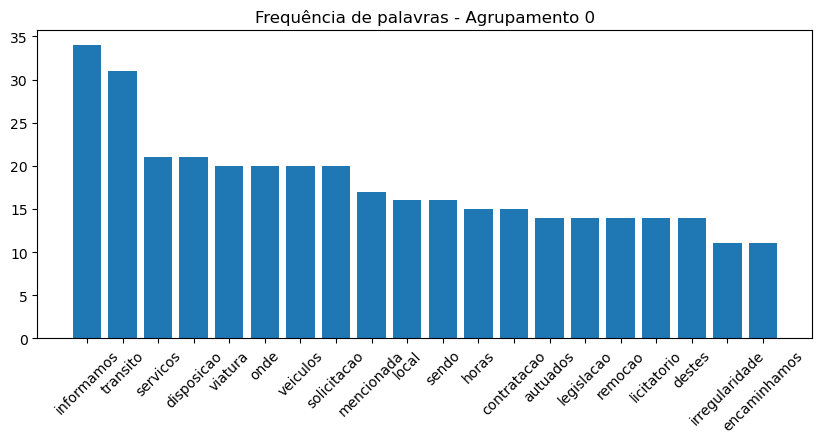

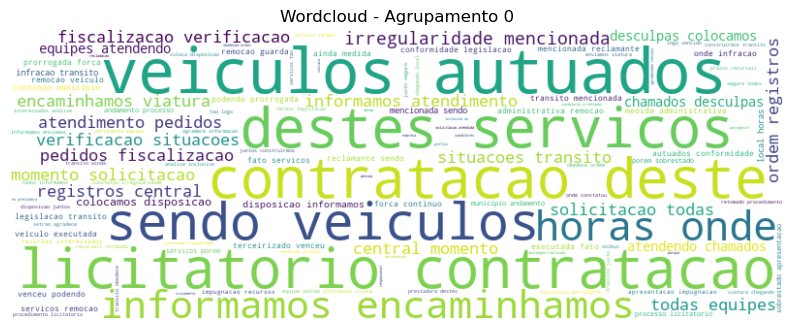

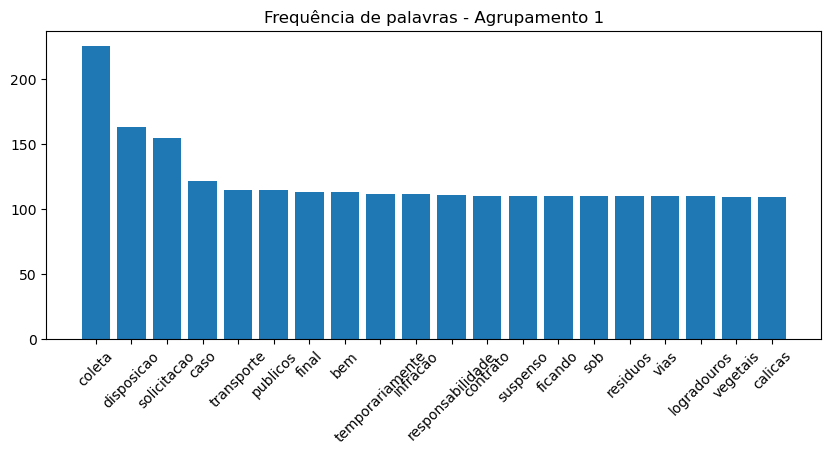

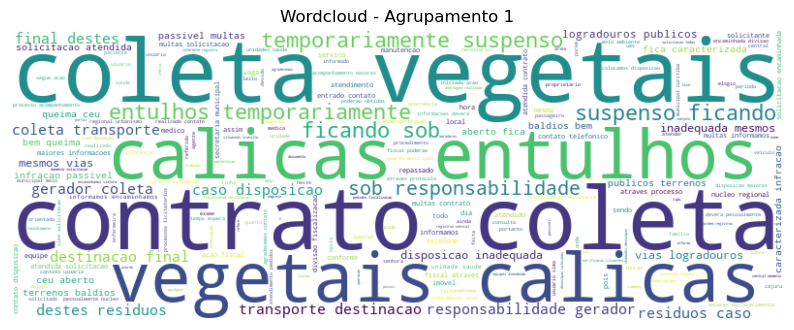

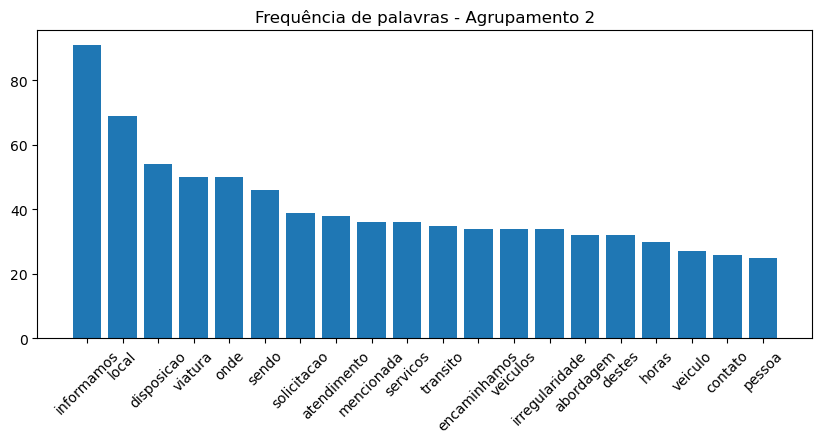

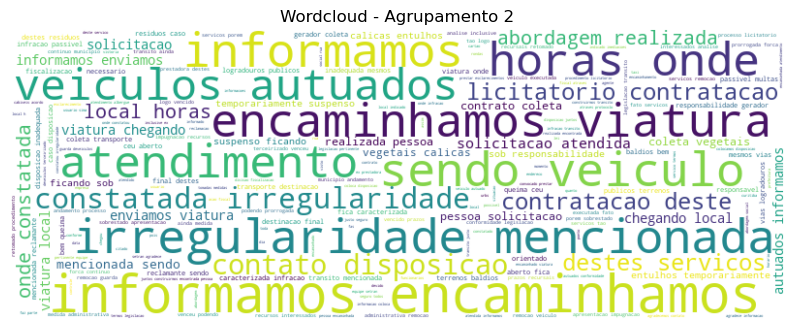

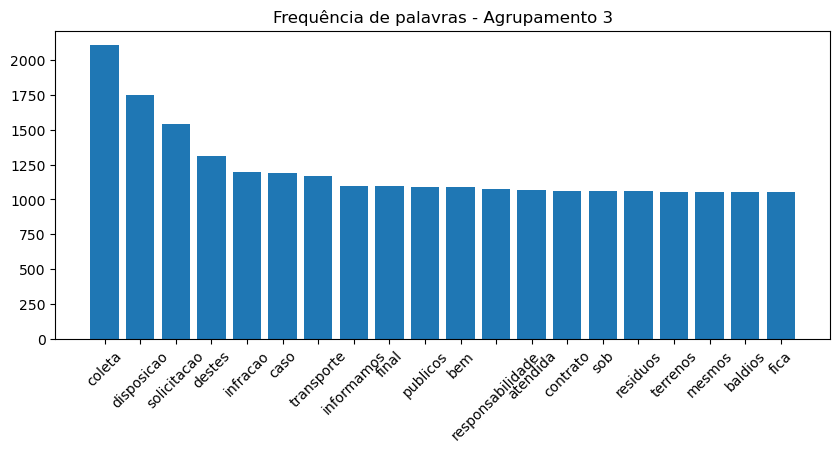

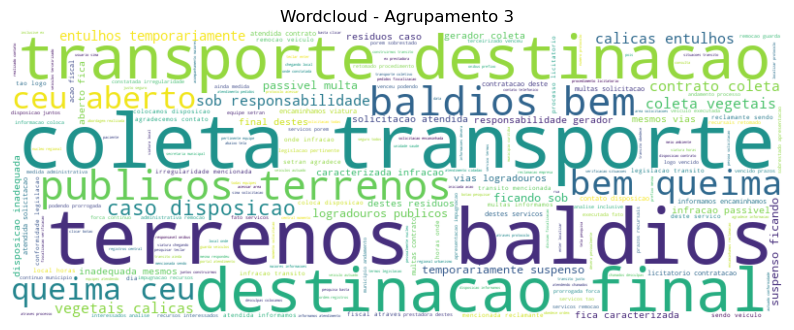

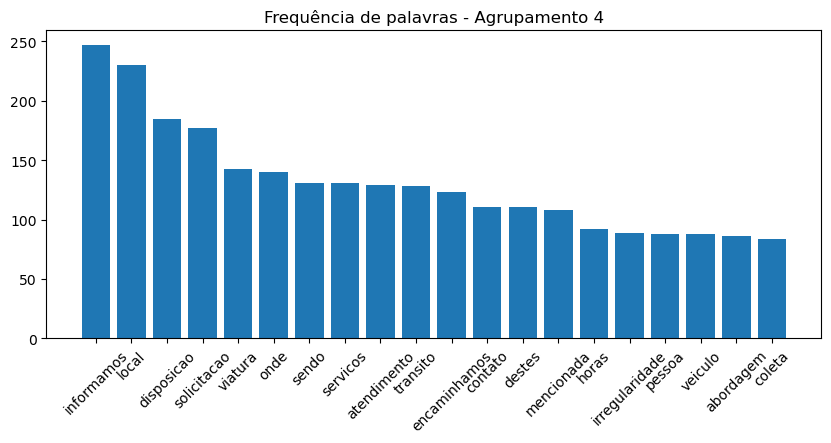

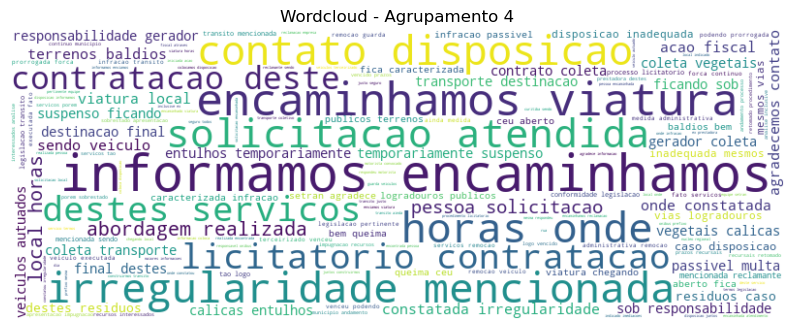

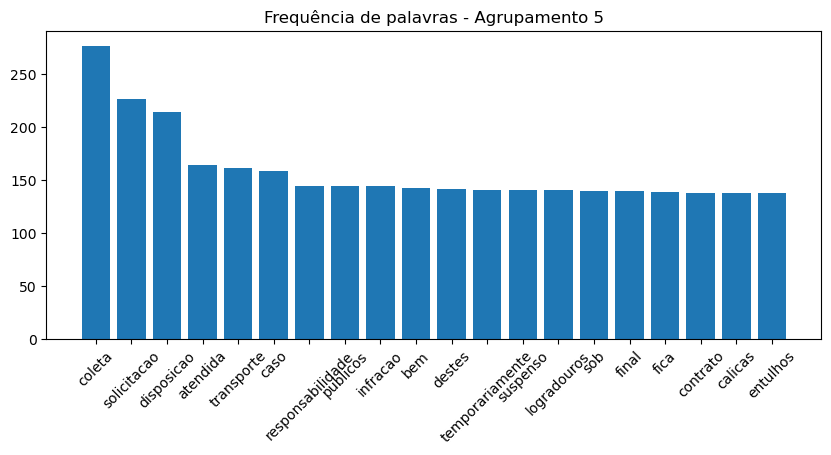

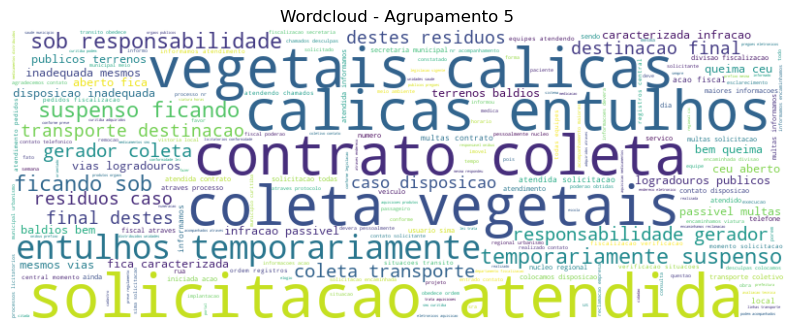

In [86]:
from collections import Counter
from wordcloud import WordCloud

import matplotlib.pyplot as plt

for grupo, texto in textos_por_agrupamento.items():
  # Tokenização simples
  palavras = texto.split()
  contagem = Counter(palavras)
  # Gráfico de frequência
  plt.figure(figsize=(10,4))
  mais_comuns = contagem.most_common(20)
  plt.bar([p[0] for p in mais_comuns], [p[1] for p in mais_comuns])
  plt.title(f'Frequência de palavras - Agrupamento {grupo}')
  plt.xticks(rotation=45)
  plt.show()
  # Wordcloud
  wc = WordCloud(width=800, height=300, background_color='white').generate(texto)
  plt.figure(figsize=(10,4))
  plt.imshow(wc, interpolation='bilinear')
  plt.axis('off')
  plt.title(f'Wordcloud - Agrupamento {grupo}')
  plt.show()

Os agrupamentos 0, 2, 3 e 4 apresentam uma alta frequência de palavras relacionadas a veículos e trânsito, como "trânsito" e "veículo", isso indica que esses agrupamentos tem reclamações relacionadas a esse tema, porém não necessariamente apenas esse tema. Já os agrupamentos 1, 3 e 5 apresentam uma alta frequência de palavras relacionadas a resíduos, coleta e entulho. Outras palavras como "solicitação", "infração" e "contrato" também aparecem com frequência, o que é esperado, pois são palavras comuns em reclamações e solicitações de serviços públicos.

Apesar de não ser um problema específico, a maior parte dos agrupamentos tem uma frequência alta da palavra "viatura", o que indica que muitas reclamações solicitam a presença de uma viatura para resolver o problema relatado.